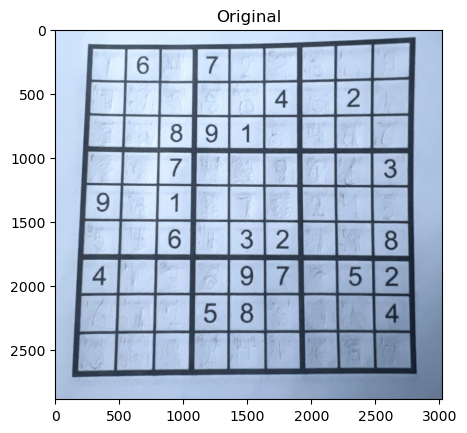

In [129]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('sudokuTest2.png', cv2.IMREAD_COLOR)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

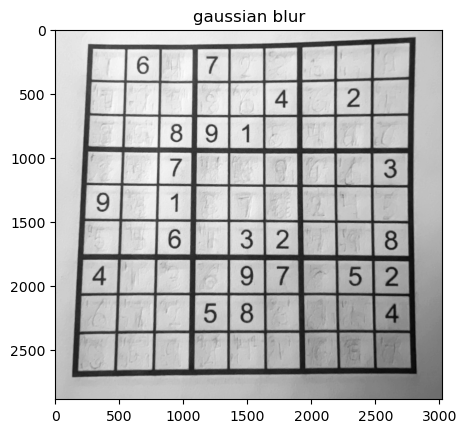

In [131]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.title('gaussian blur')
plt.imshow(blurred, cmap='gray')
plt.show()

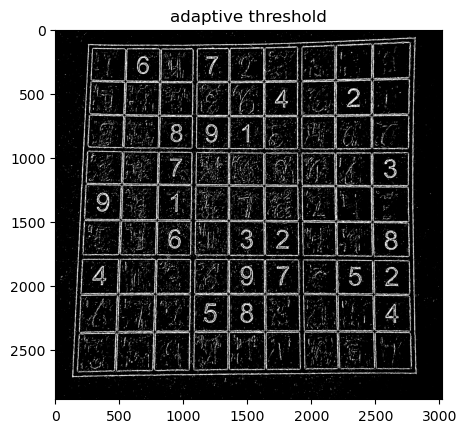

In [133]:
imgThreshold = cv2.adaptiveThreshold(blurred, 255, 1, 1, 11, 2)
plt.title('adaptive threshold')
plt.imshow(imgThreshold, cmap='gray')
plt.show()

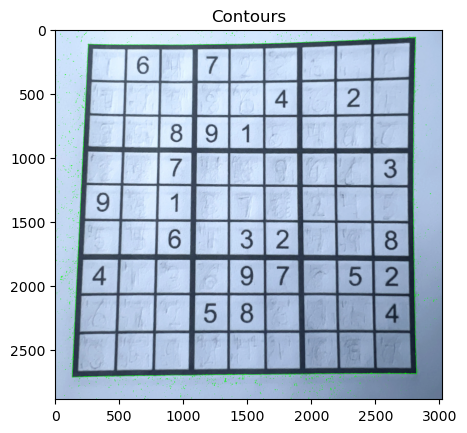

In [135]:
contours, hierarchy = cv2.findContours(
    imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)
plt.title('Contours')
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.show()

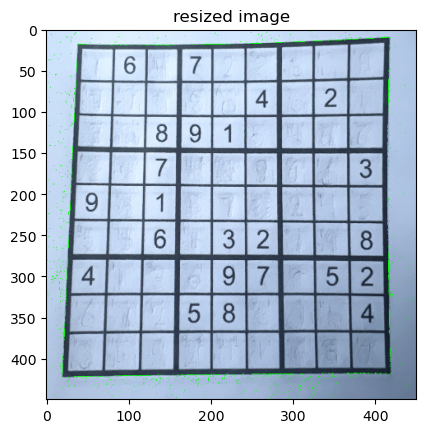

In [137]:
heightImg = 450
widthImg = 450
imgBlank = np.zeros((heightImg, widthImg, 3), np.uint8)
img_resize=cv2.resize(contour_img,(heightImg,widthImg))
plt.title('resized image')
plt.imshow(cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB))
plt.show()

In [139]:
def biggestContour(contours):
    biggest=np.array([])
    max_area=0
    for i in contours:
        area=cv2.contourArea(i)
        if area>50:
            peri = cv2.arcLength(i, True)
            approx=cv2.approxPolyDP(i,0.02*peri,True)
            if area>max_area and len(approx)==4:
                biggest=approx
                max_area=area
    return biggest,max_area

In [141]:
biggest,max_area=biggestContour(contours)
print(biggest)

[[[2811   64]]

 [[ 255  120]]

 [[ 133 2717]]

 [[2815 2694]]]


In [143]:
def reorder(myPoints):
    myPoints=myPoints.reshape((4,2))
    myPointsNew=np.zeros((4,1,2),dtype=np.int32)
    add=myPoints.sum(1)
    myPointsNew[0]=myPoints[np.argmin(add)]
    myPointsNew[3]=myPoints[np.argmax(add)]
    diff=np.diff(myPoints,axis=1)
    myPointsNew[1]=myPoints[np.argmin(diff)]
    myPointsNew[2]=myPoints[np.argmax(diff)]
    return myPointsNew

[[[ 255  120]]

 [[2811   64]]

 [[ 133 2717]]

 [[2815 2694]]]


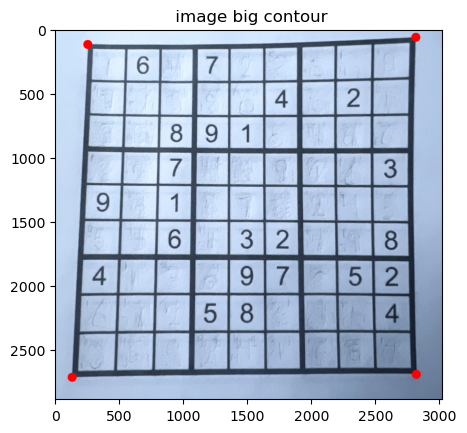

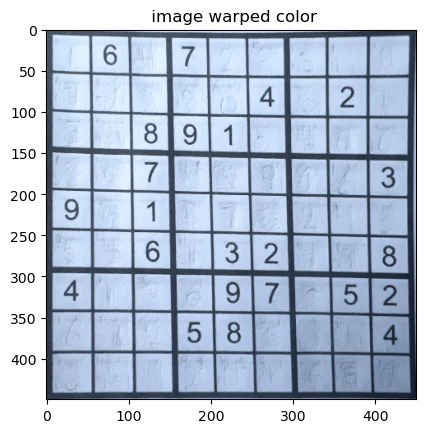

In [145]:
imgBigContour=img.copy()
if biggest.size!=0:
    biggest=reorder(biggest)
    print(biggest)
    cv2.drawContours(imgBigContour,biggest,-1,(0,0,255),70)
    pts1=np.float32(biggest)
    pts2=np.float32([[0,0],[widthImg,0],[0,heightImg],[widthImg,heightImg]])
    matrix=cv2.getPerspectiveTransform(pts1,pts2)
    imgWarpColored=cv2.warpPerspective(img,matrix,(widthImg,heightImg))
    plt.title(' image big contour')
    plt.imshow(cv2.cvtColor(imgBigContour, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.title(' image warped color')
    plt.imshow(cv2.cvtColor(imgWarpColored, cv2.COLOR_BGR2RGB))
    plt.show()

In [147]:
def splitBoxes(img):
    rows=np.vsplit(img,9)
    boxes=[]
    for r in rows:
        cols=np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes
    

In [149]:
boxes=splitBoxes(imgWarpColored)
len(boxes)

81

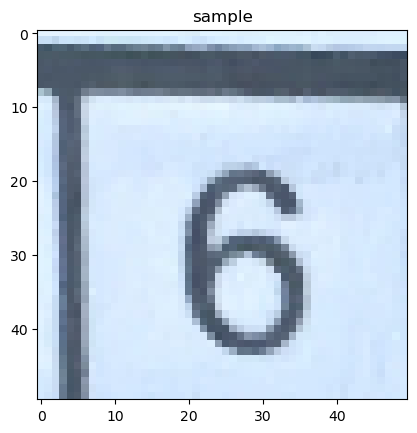

In [151]:
plt.title('sample')
plt.imshow(cv2.cvtColor(boxes[1], cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
from keras.models import load_model
model = load_model("digit_classifier_model.keras")
